# Raspberry Pi Flightradar24: Track Nearby Aircraft
[written in markdown](https://daringfireball.net/projects/markdown/syntax)

[Raspberry Pi Flightradar24](https://pimylifeup.com/raspberry-pi-flightradar24/)

In this Raspberry Pi Flightradar24 tutorial, I go through the steps to set up a flight tracker that feeds to the FlightRadar24 service.

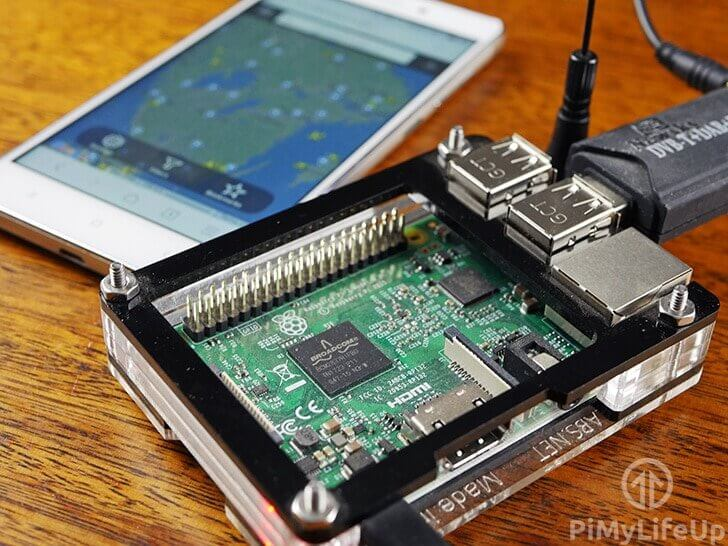

I had covered an [ADS-B tracker before](https://pimylifeup.com/raspberry-pi-ads-b-receiver/) but utilized the FlightAware software. Depending on personal preference you may prefer to use Flightradar24 instead. Both have their pros and cons.

One of the most significant benefits to running your own flight tracker is that you get the Flightradar24 business account for free. That’s a $499 yearly subscription you will get for free in exchange for sharing the ADS-B data. Perfect if you love tracking flights around your house.

The distance that your ADS-B tracker will be able to see depends on the location and line of sight of your [DVB-T antenna](https://0g.pimylifeup.com/3gApCj/amazon/adsbreceiver). It should cover roughly 140-480 km (87-300 miles), maybe more or less.

The entire tutorial is right below, or you can find it in our [massive raspberry pi project book](https://pimylifeup.com/ultimate-book-of-pi/?utm_source=flightradar&utm_medium=link).

## Equipment

All the equipment that you need to setup this Flightradar24 tutorial is listed right below.

### Recommended

 - [Raspberry Pi](https://0g.pimylifeup.com/l8KF94/amazon/raspberrypi)

 - [Micro SD Card](https://0g.pimylifeup.com/DUVENo/amazon/microsdcard)

 - [Ethernet Cable](https://0g.pimylifeup.com/9YIU76/amazon/ethernetcord) or [WiFi dongle (Pi 3 has WiFi inbuilt)](https://0g.pimylifeup.com/89vmLk/amazon/wifidongle)

 - [Power Adapter](https://0g.pimylifeup.com/TwjJnF/amazon/powersupply)

 - [Mini DVB-T Digital TV USB Dongle](https://0g.pimylifeup.com/3gApCj/amazon/adsbreceiver)

### Optional
 - [Raspberry Pi Case](https://0g.pimylifeup.com/vbWKKX/allraspberrypicases)

 - [USB Keyboard](https://0g.pimylifeup.com/FiheVF/amazon/usbkeyboard)

 - [USB Mouse](https://0g.pimylifeup.com/2VE9AD/amazon/usbmouse)

## Signing up to Flightradar24

Before you get started, you will want first to sign up Flightradar24. It’s a pretty simple process and will make things a little easier later. You can sign up to [Flightradar24 at their website](https://www.flightradar24.com/premium/signup?account=free).

You will need to confirm your email once you have signed up. Just select the basic (free) plan while we set up the Raspberry Pi.

## Installing the Flightradar24 from Scratch

This section goes through the steps of installing Flightradar24 from complete scratch. It involves wiping an SD card and everything on it. This option is easiest if you don’t mind wiping your SD card.

1. First, download the [latest image of FlightRadar24](http://repo.feed.flightradar24.com/rpi_images/fr24-raspberry-pi-latest.img.zip) 675MB

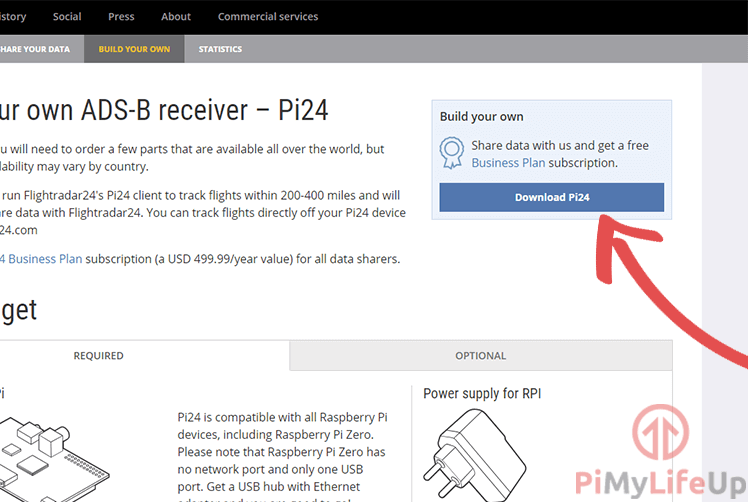

2. You will now need a tool to be able to write the image to the SD Card. Etcher is a great solution and is available for download on [their official website](https://etcher.io/). It will work on most popular operating systems such as Windows, Linux, and Mac OSx.

3. Once you have installed Etcher, open it up. Next, **select image** and then browse to the image that we just downloaded.

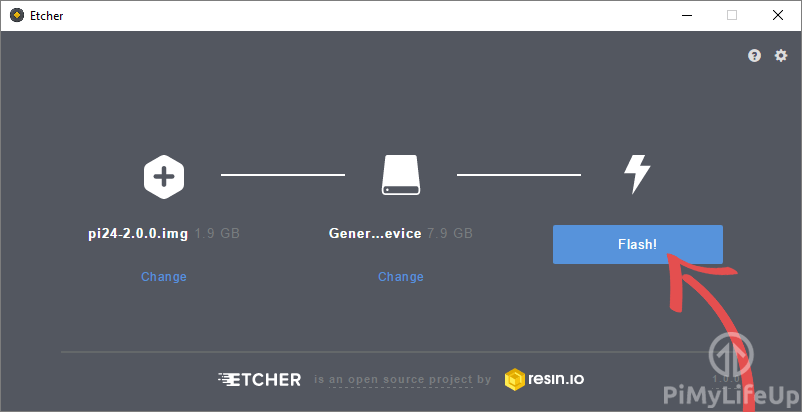

4. In the next step, you will need to select the drive you wish to use. Make sure it’s correct as this process will wipe the drive.

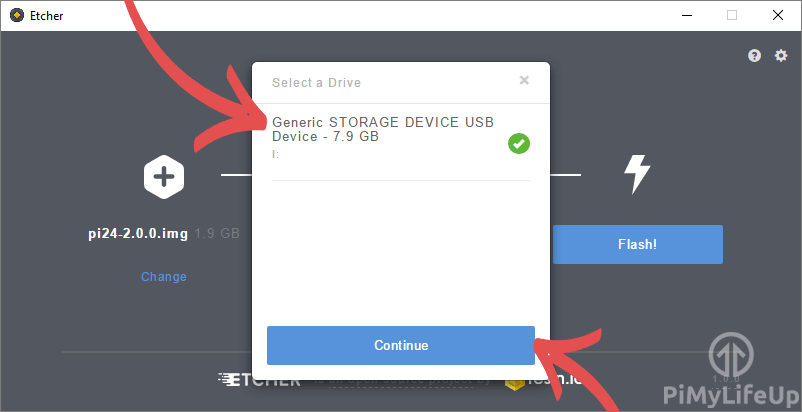

5. Click the flash button to begin the process of writing to the SD Card. This process may take some time to complete.

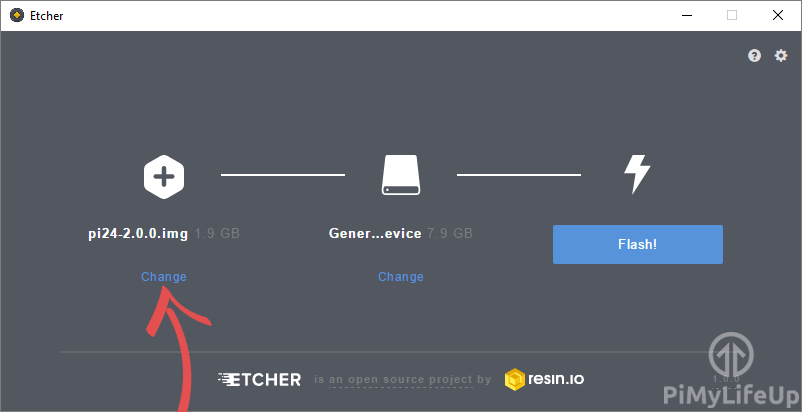

6. Once completed, insert the SD card into the Raspberry Pi and power it on. You will need access to the terminal to complete the next few steps. You will need to press **ctrl+alt+f2** to access the terminal on the Raspberry Pi. The login details are the defaults of Raspbian.  The username is **pi**, and the password is **raspberry**.

7. If you have an ethernet cable connected then the Pi should have network access. Otherwise, you will also want to set up WiFi, follow our WiFi tutorial to [set up a WiFi connection](https://pimylifeup.com/setting-up-raspberry-pi-wifi/) within the terminal.

8. Once the network is set up, go to the terminal either on the Raspberry Pi or via SSH and enter the following line. Do not proceed if your Pi lacks an internet connection.

`sudo fr24feed --signup`

Go to the FlightRadar24 Configuration section in this tutorial to proceed with the configuring the software.

## Installing FlightRadar24 on Raspbian

If you already have Raspbian installed and don’t wish to start from scratch, then this is the best option for you. The process is easy, and you shouldn’t run into any issues. It might be a good idea to [backup your SD card](https://pimylifeup.com/backup-raspberry-pi/) before you start if you do not want to risk data loss.

1. Enter the following command into the terminal on the Raspberry Pi.

`sudo bash -c "$(wget -O - http://repo.feed.flightradar24.com/install_fr24_rpi.sh)"`

2. You will next be asked some questions such as the fr24 sharing key, antenna position, and some other details.

3. Please proceed to the next section on how you should fill the questionnaire out.



## FlightRadar24 Configuration

In this section, I go through all the configuration questions that you will be asked at setup or when you run the following command.

`sudo fr24feed --signup`

**Email Address**: Enter the same email you signed up to Flightradar24 using. This email address is also where your FR24 key will be sent. Once your feed is up and running, it should appear in your account automatically.

**FR24 Key**: If you have never used Flightradar24 to feed data then you will not have an FR24 key. Leave this question blank unless you have an FR24 key.

**MLAT Calculations**: Enter yes for this question.

**Latitude & Longitude**: Use a website like [latlong.net](https://www.latlong.net/) to calculate your latitude and longitude of the antenna. Try and be as accurate as possible. Latitude is in the format of xx.xxxx and longitude is xx.xxxx (Leave out any extra numbers)

**Altitude**: Use a website like [whatismyelevation.com](https://www.whatismyelevation.com/) to work out how high the antenna is from sea level.

**Receiver Selection**: If you’re using the DVB-T stick then select 1. Otherwise observe the other choices you have here.

**Dump1090 Arguments**: Leave this blank and proceed by pressing enter.

**Raw Data Feed**: Enter no, unless you know you will need it.

**Basestation data feed**: Enter no, unless you know you will need it.

**Logfile mode**: Set this to 48-hour, 24 rotation.

**Logfile path**:  If you want a specific path for where you want the log files to be stored then enter something here otherwise just press enter to proceed.

1. The program should now return that the process has been completed and provide you with a sharing key. Save this key as you may need it in the future.


2. To start sending data, enter the following command.

`sudo systemctl restart fr24feed`

3. You can check the status of your feed by running the following command.

`fr24feed-status`

4. If you go to the [data sharing page](https://www.flightradar24.com/account/data-sharing) on the FlightRadar website, you should also now see your feed.

5. If you want to see the web interface of your feed, then go to its IP in the web browser followed by the **port 8754**. Below is an example of mine.

http://192.168.0.143:8754

6. You should now have a fully functional Raspberry Pi Flightradar24 feed up and running. If you run into any issues, then check out the [FlightRadar24 forums](https://forum.flightradar24.com/forums/30-Flightradar24-(feeding-data-to-Flightradar24) for some help.

## Troubleshooting

If you’re having trouble with this tutorial then the tips below should help solve some of the most common issues.

- It might take some time before your feed will show as online on the Flightradar24 website. It took roughly 30 minutes until it showed up as online.
- MLAT initially wasn’t working but eventually started working within a few hours without any extra configuration.
- Antenna location dictates how many planes you will be track. Try and get it so that the tracker will have an ideal line of sight of the sky. Hills, building and anything substantial will block the ADS-B receiver from tracking accurately.
- It is highly recommended that you update the default password of the Raspbian. This change will help secure your Pi against hackers.
- You can install more than one feed to the Raspberry Pi. If you want to also feed to FlightAware, you can also set that up too. However, dump1090-mutability will need to be installed before either of the feeds.
- Low power to the Raspberry Pi can cause issues. If you notice your Pi is having power issues then try replacing the power supply with something more powerful and stable.

I hope that this Raspberry Pi Flightradar24 tutorial has helped you with setting up an ADS-B flight tracker. If you have some feedback, tips, or anything else then feel free to leave a comment on our forums.